In [131]:
import pandas as pd

In [132]:
pred_PLS_SM = pd.read_csv("./data/data/PLS_SM/tar_pred.csv")
pred_PLS_SM.drop(columns=["Unnamed: 0"], axis=1, inplace=True)

pred_ICA = pd.read_csv("./data/data/jade/ica/tar_pred.csv")
pred_ICA["Sample Name"] = pred_ICA["target"]
pred_ICA.drop(columns=["target"], axis=1, inplace=True)

In [133]:
pred_ICA.columns

Index(['ID', 'SiO2', 'TiO2', 'Al2O3', 'FeOT', 'MgO', 'CaO', 'Na2O', 'K2O',
       'Sample Name'],
      dtype='object')

In [134]:
pred_ICA.head()

,ID,SiO2,TiO2,Al2O3,FeOT,MgO,CaO,Na2O,K2O,Sample Name
0,jsc1399_2013_09_11_151245_ccs,54.358193,0.915070,20.829506,13.384058,6.189111,8.389946,4.604968,1.085528,jsc1399
1,r65_2013_11_05_151321_ccs,58.864656,0.057594,12.543319,4.811779,6.537739,5.210740,2.962094,2.150490,r65
2,vzo106_2013_09_03_181628_ccs,66.275026,0.698434,12.804766,8.597515,-0.085340,1.824899,2.953498,1.731704,vzo106
3,201424_2013_11_06_155255_ccs,64.125299,0.886038,14.750741,4.977112,4.747535,2.304864,2.753124,2.874335,201424
4,jsc1424_2013_09_16_145015_ccs,57.353441,1.176242,13.347413,12.256024,3.557050,5.910352,1.648106,0.378352,jsc1424


In [135]:
ids_to_keep = pred_ICA["ID"]
filtered_pred_PLS_SM = pred_PLS_SM[pred_PLS_SM['ID'].isin(ids_to_keep)]

In [136]:
filtered_pred_PLS_SM.set_index("ID", inplace=True)
pred_ICA.set_index("ID", inplace=True)

In [137]:
aligned_pred_PLS_SM, aligned_pred_ICA = filtered_pred_PLS_SM.align(pred_ICA, join="inner", axis=0)

In [138]:
aligned_pred_PLS_SM

,Sample Name,SiO2,TiO2,Al2O3,FeOT,MgO,CaO,Na2O,K2O
ID,,,,,,,,,
jsc1426_2013_09_16_151528_ccs,jsc1426,46.015787,0.615741,8.982448,18.802886,-1.197973,0.765031,0.506897,4.749488
bk2_2013_08_06_184259_ccs,bk2,55.148347,0.782553,15.453053,6.325690,2.893775,3.507446,3.978380,3.642669
jsc1379_2013_09_10_142041_ccs,jsc1379,52.258535,0.714758,18.364322,8.921199,3.910361,3.287444,3.756207,1.780950
gbw07108_2013_08_07_145651_ccs,gbw07108,45.569217,0.557648,10.585019,6.289040,4.383953,6.951946,0.678718,2.150625
jsc1456_2013_09_18_160559_ccs,jsc1456,48.426663,2.145864,18.298883,10.225242,4.782303,5.537618,4.506823,1.987494
...,...,...,...,...,...,...,...,...,...
gbw07105_2013_08_07_142727_ccs,gbw07105,49.771327,1.473036,14.713141,11.086060,7.782733,4.459390,3.704492,2.178797
sarm51_2013_08_29_145612_ccs,sarm51,49.190170,0.799631,12.382981,13.758491,1.095608,2.201404,0.492530,1.876204
s4_2013_11_05_155948_ccs,s4,58.796488,0.990135,19.329695,7.121395,1.254279,0.494075,0.678485,3.839738


In [139]:
from lib.reproduction import weighted_sum_oxide_percentages, major_oxides

merged_df = pd.merge(aligned_pred_ICA, aligned_pred_PLS_SM, on='Sample Name', suffixes=('_ICA', '_PLS_SM'))
moc_predictions = pd.DataFrame()

for oxide in major_oxides:
    w_ica = weighted_sum_oxide_percentages[oxide]['ICA'] / 100
    w_pls_sm = weighted_sum_oxide_percentages[oxide]['PLS1-SM'] / 100
    moc_predictions[oxide] = merged_df[oxide + '_ICA'] * w_ica + merged_df[oxide + '_PLS_SM'] * w_pls_sm

moc_predictions['Sample Name'] = merged_df['Sample Name']
moc_predictions['ID'] = aligned_pred_ICA.index

In [140]:
moc_predictions

,SiO2,TiO2,Al2O3,FeOT,MgO,CaO,Na2O,K2O,Sample Name,ID
0,52.724270,0.005176,9.016697,18.065080,-1.385724,2.439371,2.587701,2.500915,jsc1426,jsc1426_2013_09_16_151528_ccs
1,58.960363,1.438100,17.900229,6.094914,3.065080,3.733459,5.874148,5.348764,bk2,bk2_2013_08_06_184259_ccs
2,53.506745,0.884324,18.507751,9.240353,4.626533,5.031410,4.620467,0.999622,jsc1379,jsc1379_2013_09_10_142041_ccs
3,31.841222,0.202129,9.888421,6.371858,6.981181,17.604429,2.355087,0.405167,gbw07108,gbw07108_2013_08_07_145651_ccs
4,48.462835,2.177493,19.320433,10.382637,5.188540,5.332814,3.171168,1.426377,jsc1456,jsc1456_2013_09_18_160559_ccs
...,...,...,...,...,...,...,...,...,...,...
66,45.171727,1.774128,16.120080,11.684997,8.727328,5.927630,3.659614,1.305214,gbw07105,gbw07105_2013_08_07_142727_ccs
67,52.339354,0.384872,12.344748,12.886888,-3.719405,5.702050,3.168568,0.335686,sarm51,sarm51_2013_08_29_145612_ccs
68,61.159328,1.187605,18.802366,7.484378,2.912873,0.177899,1.714586,3.750407,s4,s4_2013_11_05_155948_ccs
69,77.004721,0.307220,14.105743,5.345932,0.317681,-0.080984,1.472370,3.708839,gl7mt,gl7mt_2013_10_23_144551_ccs


In [141]:
from lib.data_handling import CompositionData

cd = CompositionData("data/data/calib/ccam_calibration_compositions.csv")

In [142]:
def merge_with_actual_data(moc_predictions):
    merged_data = pd.DataFrame()

    for index, row in moc_predictions.iterrows():
        actual_data = cd.get_composition_for_sample(row['Sample Name'])

        if not actual_data.empty:
            for oxide in major_oxides:
                merged_data.at[index, oxide + '_pred'] = row[oxide]
                merged_data.at[index, oxide + '_actual'] = actual_data[oxide].values[0]
            merged_data.at[index, 'Sample Name'] = row['Sample Name']

    return merged_data

In [143]:
from sklearn.metrics import mean_squared_error

def calculate_rmse(merged_data):
    rmse_values = {}
    for oxide in major_oxides:
        y_actual = merged_data[oxide + '_actual']
        y_pred = merged_data[oxide + '_pred']
        rmse = mean_squared_error(y_actual, y_pred, squared=False)
        rmse_values[oxide] = rmse
    return rmse_values

# Usage example
merged_moc_actual_df = merge_with_actual_data(moc_predictions)
moc_rmse_values = calculate_rmse(merged_moc_actual_df)

/home/christian/projects/p9/baseline/venv/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/home/christian/projects/p9/baseline/venv/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/home/christian/projects/p9/baseline/venv/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/home/christian/projects/p9/baseline/venv/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squa

In [144]:
SiO2_eval_df = pd.merge(merged_df[["SiO2_ICA", "SiO2_PLS_SM", "Sample Name"]], 
                    merged_moc_actual_df[["SiO2_actual", "SiO2_pred", "Sample Name"]], 
                    on="Sample Name")

SiO2_eval_df = SiO2_eval_df[0:5]
SiO2_eval_df

,SiO2_ICA,SiO2_PLS_SM,Sample Name,SiO2_actual,SiO2_pred
0,59.432752,46.015787,jsc1426,19.3,52.724270
1,62.772379,55.148347,bk2,58.83,58.960363
2,54.754955,52.258535,jsc1379,48.93,53.506745
3,18.113227,45.569217,gbw07108,15.6,31.841222
4,48.499007,48.426663,jsc1456,49.31,48.462835


/home/christian/projects/p9/baseline/venv/lib/python3.10/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/christian/projects/p9/baseline/venv/lib/python3.10/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/christian/projects/p9/baseline/venv/lib/python3.10/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_gro

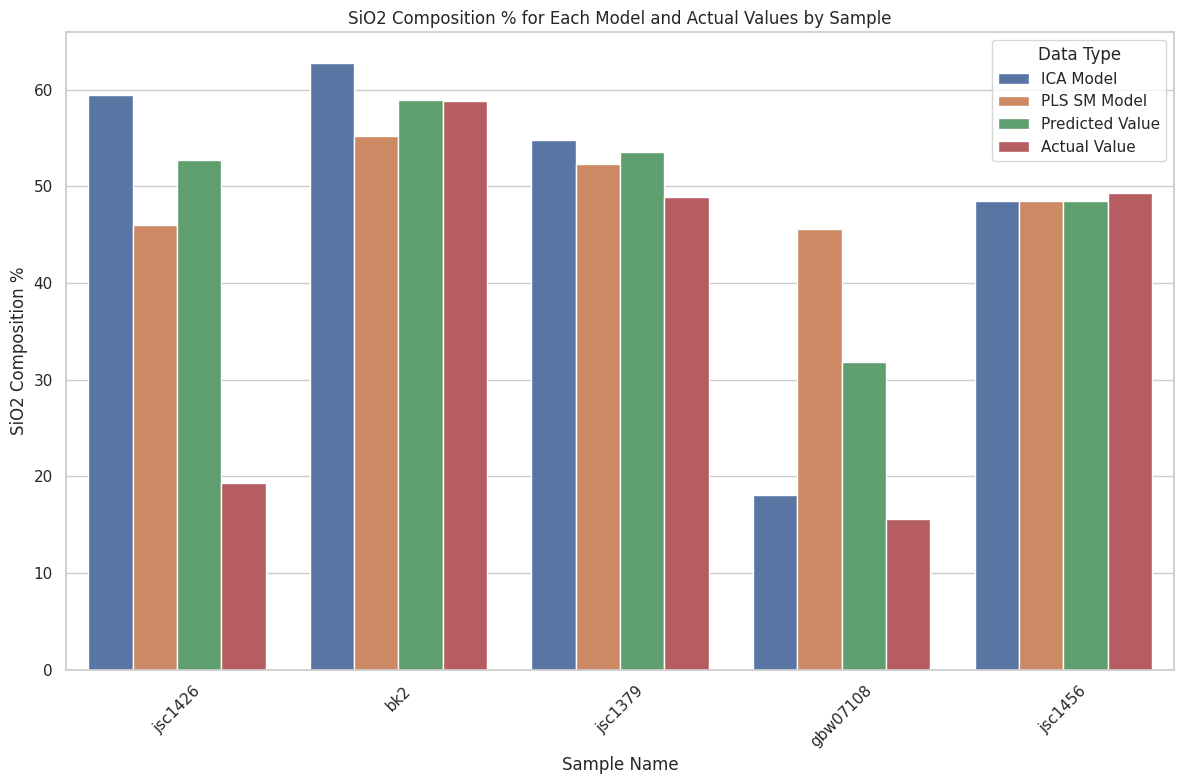

In [145]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting the style for the plot
sns.set(style="whitegrid")

# Creating a figure for the plot
plt.figure(figsize=(12, 8))

# Creating aliases for the value_vars
aliases = {
    'SiO2_ICA': 'ICA Model',
    'SiO2_PLS_SM': 'PLS SM Model',
    'SiO2_pred': 'Predicted Value',
    'SiO2_actual': 'Actual Value'
}

# Merging the data for actual and predicted values for the plot
melted_data = pd.melt(SiO2_eval_df, id_vars='Sample Name', value_vars=list(aliases.keys()))

# Renaming the columns based on aliases
melted_data = melted_data.rename(columns={'variable': 'Model/Value', 'value': 'SiO2 Composition %'})
melted_data['Model/Value'] = melted_data['Model/Value'].map(aliases)

# Creating the grouped bar chart
sns.barplot(x='Sample Name', y='SiO2 Composition %', hue='Model/Value', data=melted_data)

# Adding labels and title
plt.xlabel('Sample Name')
plt.ylabel('SiO2 Composition %')
plt.title('SiO2 Composition % for Each Model and Actual Values by Sample')
plt.xticks(rotation=45)
plt.legend(title='Data Type')

plt.gca().invert_yaxis()

# Displaying the plot
plt.tight_layout()
plt.show()

In [146]:
merged_moc_actual_df

,SiO2_pred,SiO2_actual,TiO2_pred,TiO2_actual,Al2O3_pred,Al2O3_actual,FeOT_pred,FeOT_actual,MgO_pred,MgO_actual,CaO_pred,CaO_actual,Na2O_pred,Na2O_actual,K2O_pred,K2O_actual,Sample Name
0,52.724270,19.3,0.005176,0.08,9.016697,1.49,18.065080,65.85,-1.385724,0.77,2.439371,0.77,2.587701,0.45,2.500915,0.16,jsc1426
1,58.960363,58.83,1.438100,1.94,17.900229,14.77,6.094914,7.90,3.065080,2.82,3.733459,4.64,5.874148,3.35,5.348764,3.99,bk2
2,53.506745,48.93,0.884324,0.57,18.507751,22.66,9.240353,7.67,4.626533,4.34,5.031410,9.80,4.620467,3.13,0.999622,0.45,jsc1379
3,31.841222,15.6,0.202129,0.33,9.888421,5.03,6.371858,2.27,6.981181,5.19,17.604429,35.67,2.355087,0.08,0.405167,0.78,gbw07108
4,48.462835,49.31,2.177493,2.72,19.320433,16.46,10.382637,10.93,5.188540,3.93,5.332814,6.75,3.171168,4.58,1.426377,1.82,jsc1456
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66,45.171727,44.64,1.774128,2.37,16.120080,13.83,11.684997,12.06,8.727328,7.77,5.927630,8.81,3.659614,3.38,1.305214,2.32,gbw07105
67,52.339354,33.81,0.384872,0.82,12.344748,11.87,12.886888,16.52,-3.719405,0.92,5.702050,0.86,3.168568,0.07,0.335686,0.33,sarm51
68,61.159328,67.4,1.187605,0.9,18.802366,16.30,7.484378,5.14,2.912873,1.81,0.177899,0.21,1.714586,0.81,3.750407,3.4,s4
69,77.004721,77.54,0.307220,0.33,14.105743,11.17,5.345932,2.54,0.317681,1.08,-0.080984,0.07,1.472370,2.33,3.708839,2.39,gl7mt


In [147]:
moc_rmse_values

{'SiO2': 9.08984215839267,
 'TiO2': 0.5121775687985269,
 'Al2O3': 3.102383094442587,
 'FeOT': 7.6407790269160545,
 'MgO': 1.6705541959455112,
 'CaO': 4.869030012363522,
 'Na2O': 1.099542215780908,
 'K2O': 1.1566601302753066}

In [148]:
ICA_actual_merged_df = merge_with_actual_data(aligned_pred_ICA)
ICA_rmses = calculate_rmse(ICA_actual_merged_df)

PLS_SM_actual_merged_df = merge_with_actual_data(aligned_pred_PLS_SM)
PLS_SM_rmses = calculate_rmse(PLS_SM_actual_merged_df)

ICA_rmses

/home/christian/projects/p9/baseline/venv/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/home/christian/projects/p9/baseline/venv/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/home/christian/projects/p9/baseline/venv/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/home/christian/projects/p9/baseline/venv/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squa

{'SiO2': 10.733351503419852,
 'TiO2': 0.630111277136453,
 'Al2O3': 5.548546427605581,
 'FeOT': 8.299246038856959,
 'MgO': 2.9022778097822357,
 'CaO': 3.521759082875863,
 'Na2O': 1.720635345835822,
 'K2O': 1.367247198773664}

In [149]:
PLS_SM_actual_merged_df

,SiO2_pred,SiO2_actual,TiO2_pred,TiO2_actual,Al2O3_pred,Al2O3_actual,FeOT_pred,FeOT_actual,MgO_pred,MgO_actual,CaO_pred,CaO_actual,Na2O_pred,Na2O_actual,K2O_pred,K2O_actual,Sample Name
jsc1426_2013_09_16_151528_ccs,46.015787,19.3,0.615741,0.08,8.982448,1.49,18.802886,65.85,-1.197973,0.77,0.765031,0.77,0.506897,0.45,4.749488,0.16,jsc1426
bk2_2013_08_06_184259_ccs,55.148347,58.83,0.782553,1.94,15.453053,14.77,6.325690,7.90,2.893775,2.82,3.507446,4.64,3.978380,3.35,3.642669,3.99,bk2
jsc1379_2013_09_10_142041_ccs,52.258535,48.93,0.714758,0.57,18.364322,22.66,8.921199,7.67,3.910361,4.34,3.287444,9.80,3.756207,3.13,1.780950,0.45,jsc1379
gbw07108_2013_08_07_145651_ccs,45.569217,15.6,0.557648,0.33,10.585019,5.03,6.289040,2.27,4.383953,5.19,6.951946,35.67,0.678718,0.08,2.150625,0.78,gbw07108
jsc1456_2013_09_18_160559_ccs,48.426663,49.31,2.145864,2.72,18.298883,16.46,10.225242,10.93,4.782303,3.93,5.537618,6.75,4.506823,4.58,1.987494,1.82,jsc1456
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
gbw07105_2013_08_07_142727_ccs,49.771327,44.64,1.473036,2.37,14.713141,13.83,11.086060,12.06,7.782733,7.77,4.459390,8.81,3.704492,3.38,2.178797,2.32,gbw07105
sarm51_2013_08_29_145612_ccs,49.190170,33.81,0.799631,0.82,12.382981,11.87,13.758491,16.52,1.095608,0.92,2.201404,0.86,0.492530,0.07,1.876204,0.33,sarm51
s4_2013_11_05_155948_ccs,58.796488,67.4,0.990135,0.9,19.329695,16.30,7.121395,5.14,1.254279,1.81,0.494075,0.21,0.678485,0.81,3.839738,3.4,s4
gl7mt_2013_10_23_144551_ccs,78.087196,77.54,0.647054,0.33,12.492210,11.17,6.452859,2.54,0.225719,1.08,-0.372200,0.07,2.256293,2.33,2.159493,2.39,gl7mt


In [150]:
PLS_SM_rmses

{'SiO2': 9.951816697547613,
 'TiO2': 0.5002382481228063,
 'Al2O3': 2.852473096335654,
 'FeOT': 7.556123934764989,
 'MgO': 1.6887135235452757,
 'CaO': 7.202871051319311,
 'Na2O': 0.6722069543681377,
 'K2O': 1.1615433853753843}

In [151]:
RMSEs_df = pd.DataFrame([ICA_rmses, PLS_SM_rmses, moc_rmse_values], index=["ICA", "PLS_SM", "MOC (ours)"])

In [152]:
RMSEs_df.T

,ICA,PLS_SM,MOC (ours)
SiO2,10.733352,9.951817,9.089842
TiO2,0.630111,0.500238,0.512178
Al2O3,5.548546,2.852473,3.102383
FeOT,8.299246,7.556124,7.640779
MgO,2.902278,1.688714,1.670554
CaO,3.521759,7.202871,4.869030
Na2O,1.720635,0.672207,1.099542
K2O,1.367247,1.161543,1.156660


In [153]:
MOC_model_rmses = {
    'SiO2': 5.83,
    'TiO2': 1.10,
    'Al2O3': 3.18,
    'FeOT': 2.90,
    'MgO': 2.30,
    'CaO': 1.14,
    'Na2O': 1.34,
    'K2O': 1.49
 }

In [154]:
R_df = RMSEs_df.T
R_df['MOC (actual)'] = MOC_model_rmses.values()

In [155]:
R_df
# R_df.to_csv("eval.csv")

,ICA,PLS_SM,MOC (ours),MOC (actual)
SiO2,10.733352,9.951817,9.089842,5.83
TiO2,0.630111,0.500238,0.512178,1.10
Al2O3,5.548546,2.852473,3.102383,3.18
FeOT,8.299246,7.556124,7.640779,2.90
MgO,2.902278,1.688714,1.670554,2.30
CaO,3.521759,7.202871,4.869030,1.14
Na2O,1.720635,0.672207,1.099542,1.34
K2O,1.367247,1.161543,1.156660,1.49


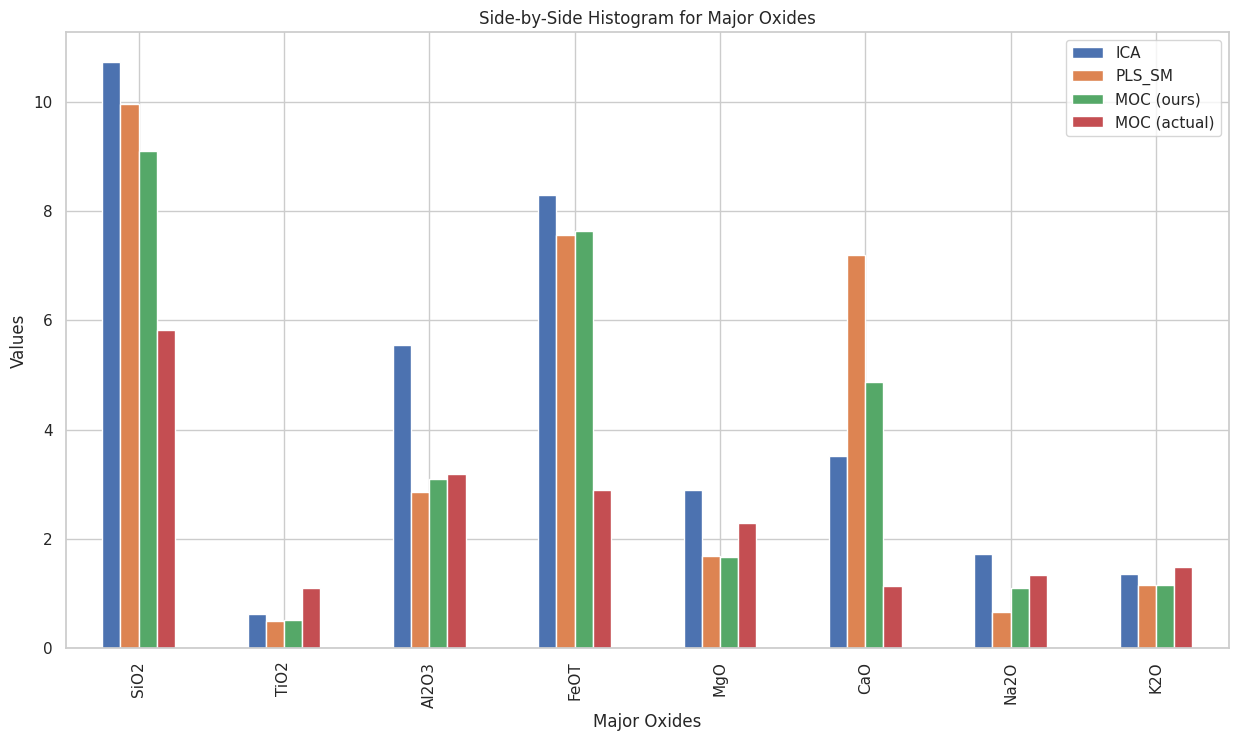

In [156]:
import matplotlib.pyplot as plt

# Setting the first column as the index
# R_df.set_index('Unnamed: 0', inplace=True)

# Creating the plot
ax = R_df.plot(kind='bar', figsize=(15, 8))

# Adding labels and title
ax.set_ylabel('Values')
ax.set_xlabel('Major Oxides')
ax.set_title('Side-by-Side Histogram for Major Oxides')

# Display the plot
plt.show()
